In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from pathlib import Path


In [2]:
#Define file path and load the file
file_path = "Resources/games-features.csv"
file_data = pd.read_csv(file_path)

#Get the Columns needed for the analysis
games_data_df = pd.DataFrame(file_data[["ResponseName", "ReleaseDate", "DemoCount", "Metacritic", "RecommendationCount", "ScreenshotCount", "SteamSpyOwners", "SteamSpyPlayersEstimate", "ControllerSupport", "IsFree", "FreeVerAvail", "PurchaseAvail", "SubscriptionAvail", "PlatformWindows", "PlatformLinux", "PlatformMac", "GenreIsNonGame", "GenreIsIndie", "GenreIsAction", "GenreIsAdventure",
"GenreIsCasual", "GenreIsStrategy", "GenreIsRPG", "GenreIsSimulation", "GenreIsEarlyAccess", "GenreIsFreeToPlay", "GenreIsSports", "GenreIsRacing", "GenreIsMassivelyMultiplayer", "PriceInitial", "PriceFinal"]])

games_data_df.head()

,ResponseName,ReleaseDate,DemoCount,Metacritic,RecommendationCount,ScreenshotCount,SteamSpyOwners,SteamSpyPlayersEstimate,ControllerSupport,IsFree,...,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial,PriceFinal
0,Counter-Strike,Nov 1 2000,0,88,68991,13,13033334,9140731,False,False,...,False,False,False,False,False,False,False,False,9.99,9.99
1,Team Fortress Classic,Apr 1 1999,0,0,2439,5,5399140,753627,False,False,...,False,False,False,False,False,False,False,False,4.99,4.99
2,Day of Defeat,May 1 2003,0,79,2319,5,7621102,1709740,False,False,...,False,False,False,False,False,False,False,False,4.99,4.99
3,Deathmatch Classic,Jun 1 2001,0,0,888,4,7498965,789676,False,False,...,False,False,False,False,False,False,False,False,4.99,4.99
4,Half-Life: Opposing Force,Nov 1 1999,0,0,2934,5,5399499,705741,False,False,...,False,False,False,False,False,False,False,False,4.99,4.99


In [3]:
#Remove the rows with garbage date values

games_data_df['ReleaseDate'] = pd.to_datetime(games_data_df['ReleaseDate'], errors='coerce')
games_data_df['ReleaseDate'].replace('', np.nan, inplace=True)

cleaned_data_df = games_data_df.dropna()

In [4]:
#Remove duplicate games
cleaned_data_df = cleaned_data_df.drop_duplicates(subset=['ResponseName'], keep='first')

In [5]:
cleaned_data_df = cleaned_data_df.rename(columns={"ResponseName": "GameName",
                                                  "Metacritic": "MetacriticRating"})

cleaned_data_df.to_csv("Resources/clean_data.csv")

cleaned_data_df.head()

,GameName,ReleaseDate,DemoCount,MetacriticRating,RecommendationCount,ScreenshotCount,SteamSpyOwners,SteamSpyPlayersEstimate,ControllerSupport,IsFree,...,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial,PriceFinal
0,Counter-Strike,2000-11-01,0,88,68991,13,13033334,9140731,False,False,...,False,False,False,False,False,False,False,False,9.99,9.99
1,Team Fortress Classic,1999-04-01,0,0,2439,5,5399140,753627,False,False,...,False,False,False,False,False,False,False,False,4.99,4.99
2,Day of Defeat,2003-05-01,0,79,2319,5,7621102,1709740,False,False,...,False,False,False,False,False,False,False,False,4.99,4.99
3,Deathmatch Classic,2001-06-01,0,0,888,4,7498965,789676,False,False,...,False,False,False,False,False,False,False,False,4.99,4.99
4,Half-Life: Opposing Force,1999-11-01,0,0,2934,5,5399499,705741,False,False,...,False,False,False,False,False,False,False,False,4.99,4.99


## Platforms and Marketing Analysis 

### (1) Which platform (Windows, Linux, Mac) has the highest player count on average?

Calculate the average player count for each platform and visualize the results using bar charts. The groupby function will help group the data by platform, and then calculate the mean player count for each group.

In [6]:
# Load cleaned dataset
file_path = "Resources/clean_data.csv"
cleaned_data_df = pd.read_csv(file_path)

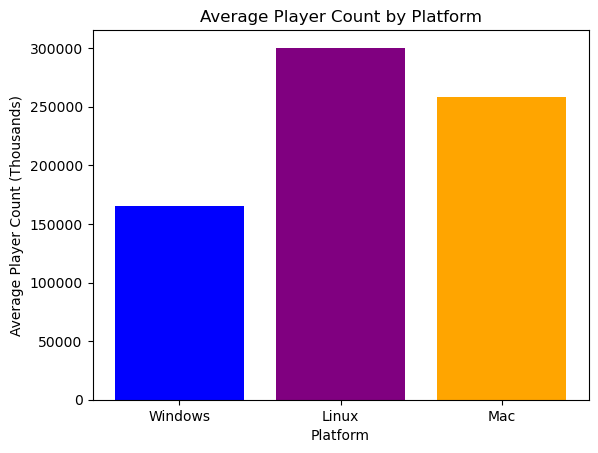

In [23]:
# Calculate the average player count for each platform
windows_player_counts = cleaned_data_df[cleaned_data_df['PlatformWindows'] == True]['SteamSpyOwners'].mean()
linux_player_counts = cleaned_data_df[cleaned_data_df['PlatformLinux'] == True]['SteamSpyOwners'].mean()
mac_player_counts = cleaned_data_df[cleaned_data_df['PlatformMac'] == True]['SteamSpyOwners'].mean()

# Create a bar chart to visualize the results
platforms = ['Windows', 'Linux', 'Mac']
average_player_counts = [windows_player_counts, linux_player_counts, mac_player_counts]
colors = ['blue', 'purple', 'orange']

plt.bar(platforms, average_player_counts, color=colors)
plt.title('Average Player Count by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Player Count (Thousands)')
plt.show()

## 1.1 To get a more comprehensive view, analyze the distribution of player counts for each platform, including metrics like median and standard deviation. To help understand not only the average player count but also the spread of player counts on each platform.

In [8]:
# Group the data by platform
platform_groups = cleaned_data_df.groupby(['PlatformWindows', 'PlatformMac', 'PlatformLinux'])

# Calculate summary statistics for player counts within each group, including mean, median, and std
summary_statistics = platform_groups['SteamSpyOwners'].agg(['mean', 'median', 'std'])

print(summary_statistics)

                                                    mean   median  \
PlatformWindows PlatformMac PlatformLinux                           
False           False       True                0.000000      0.0   
                True        False           64028.000000  64028.0   
True            False       False          117316.845063   8071.0   
                            True           128138.236948   7174.0   
                True        False          164365.239976  14886.0   
                            True           316500.295259  16321.0   

                                                    std  
PlatformWindows PlatformMac PlatformLinux                
False           False       True                    NaN  
                True        False                   NaN  
True            False       False          4.775610e+05  
                            True           6.110214e+05  
                True        False          5.311012e+05  
                            True         

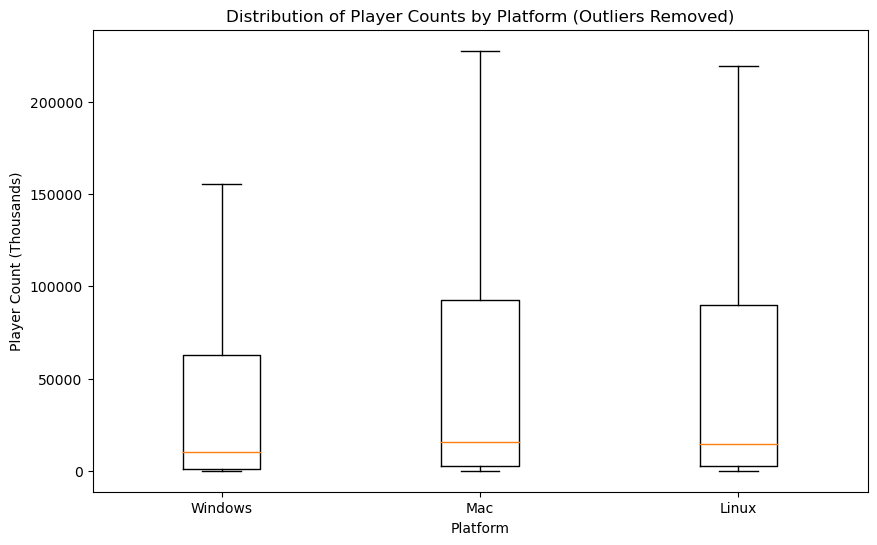

In [24]:
# Create a list to store the player counts for each platform
player_counts = [
    cleaned_data_df[cleaned_data_df['PlatformWindows']]['SteamSpyOwners'],
    cleaned_data_df[cleaned_data_df['PlatformMac']]['SteamSpyOwners'],
    cleaned_data_df[cleaned_data_df['PlatformLinux']]['SteamSpyOwners']
]

# Platform labels
platforms = ['Windows', 'Mac', 'Linux']

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(player_counts, labels=platforms, showfliers=False)
plt.title('Distribution of Player Counts by Platform (Outliers Removed)')
plt.xlabel('Platform')
plt.ylabel('Player Count (Thousands)')
plt.show()

## 1.2 Additionally, explore whether there's a correlation between the number of games available on each platform and the mean player count. This could provide insights into how the availability of games affects player counts on different platforms. 

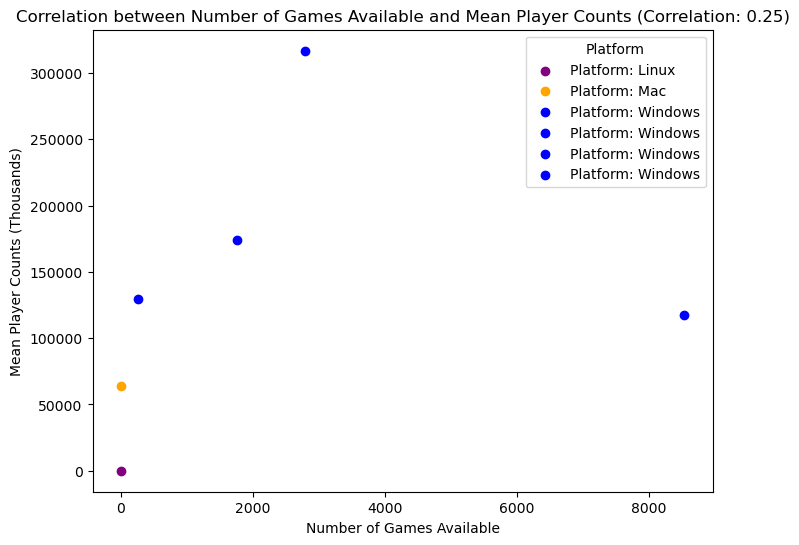

Correlation between Number of Games Available and Mean Player Counts: 0.25


In [25]:
# Calculate the mean player count for each platform
mean_player_counts = games_data_df.groupby(['PlatformWindows', 'PlatformMac', 'PlatformLinux'])['SteamSpyOwners'].mean()

# Calculate the number of games available on each platform
num_games_available = games_data_df.groupby(['PlatformWindows', 'PlatformMac', 'PlatformLinux']).size()

# Create a DataFrame to store the results
correlation_df = pd.DataFrame({'MeanPlayerCounts': mean_player_counts, 'NumGamesAvailable': num_games_available})

# Calculate the correlation between the number of games available and mean player counts
correlation = correlation_df['MeanPlayerCounts'].corr(correlation_df['NumGamesAvailable'])

# Create a scatter plot to visualize the correlation
plt.figure(figsize=(8, 6))

# Separate the data for each platform combination
for platform, data in correlation_df.groupby(level=[0, 1, 2]):
    if platform == (True, False, False):
        color = 'blue'
        platform_label = 'Windows'
    elif platform == (False, True, False):
        color = 'orange'
        platform_label = 'Mac'
    elif platform == (False, False, True):
        color = 'purple'
        platform_label = 'Linux'
    
    plt.scatter(data['NumGamesAvailable'], data['MeanPlayerCounts'], label=f'Platform: {platform_label}', c=color)

plt.title(f'Correlation between Number of Games Available and Mean Player Counts (Correlation: {correlation:.2f})')
plt.xlabel('Number of Games Available')
plt.ylabel('Mean Player Counts (Thousands)')
plt.legend(title='Platform')
plt.show()

print(f"Correlation between Number of Games Available and Mean Player Counts: {correlation:.2f}")

# Analysis 

In summary, the revised analysis suggests that, on average, there is no substantial difference in player counts between Windows, Mac, and Linux platforms in the dataset. Any initial differences observed may have been influenced by outliers or limited data availability for certain platforms. When evaluating player counts, it's essential to consider the entire dataset and potential outliers to draw accurate conclusions. 

### (2) Do games with broader platform support attract more players?
Examine this by looking at the relationship between the number of platforms a game supports and its player count. Create bar charts to show the mean rating, popularity, mean price, and price multiplied by the number of owners for different groups of games based on the number of platforms they support.

In [11]:
# Create a new column "PlatformCount" to represent the count of platforms supported by each game
cleaned_data_df['PlatformCount'] = cleaned_data_df[['PlatformWindows', 'PlatformLinux', 'PlatformMac']].sum(axis=1)

# Group the data by "PlatformCount" and calculate the metrics
platform_groups = cleaned_data_df.groupby('PlatformCount').agg({
    'MetacriticRating': 'mean',
    'RecommendationCount': 'mean',
    'PriceFinal': 'mean',
    'SteamSpyOwners': 'sum',  # Sum of owners for each group
})

# Calculate "Price * #ofOwners" for each group
platform_groups['PriceOwnersProduct'] = platform_groups['PriceFinal'] * platform_groups['SteamSpyOwners']

# Reset the index to make "PlatformCount" a regular column
platform_groups.reset_index(inplace=True)

platform_groups

,PlatformCount,MetacriticRating,RecommendationCount,PriceFinal,SteamSpyOwners,PriceOwnersProduct
0,1,10.956007,691.183118,9.156654,951855592,8.715813e+09
1,2,13.216667,986.027604,8.697901,306560737,2.666435e+09
2,3,15.883165,2666.023516,8.751418,847904291,7.420365e+09


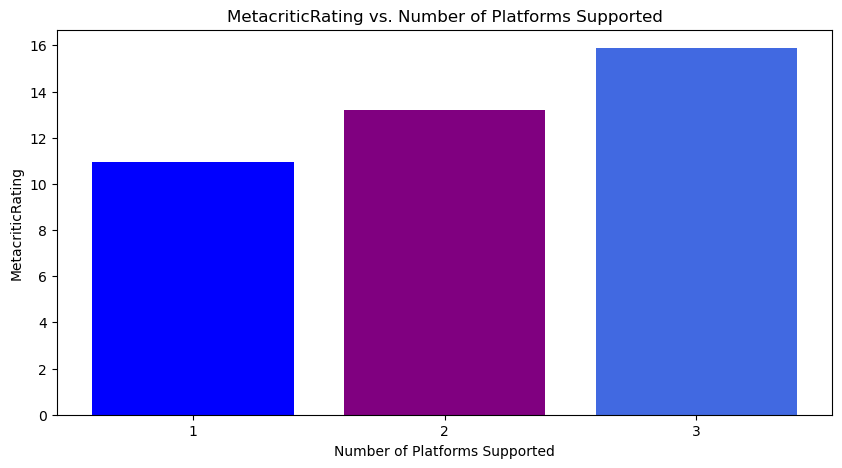

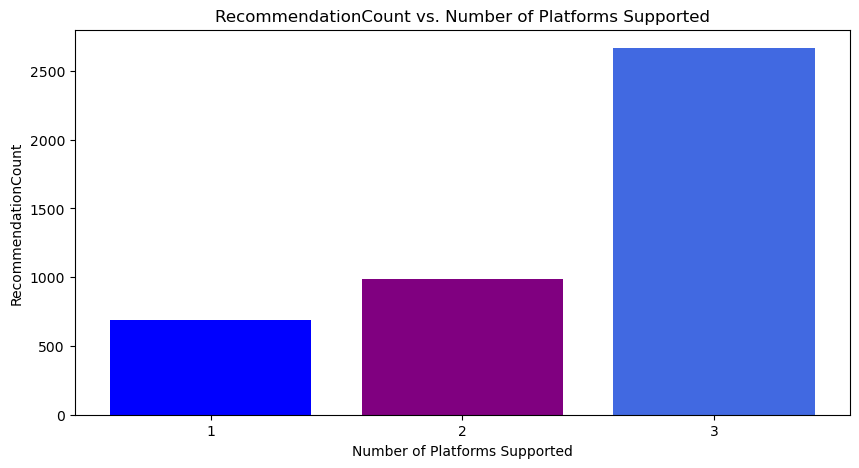

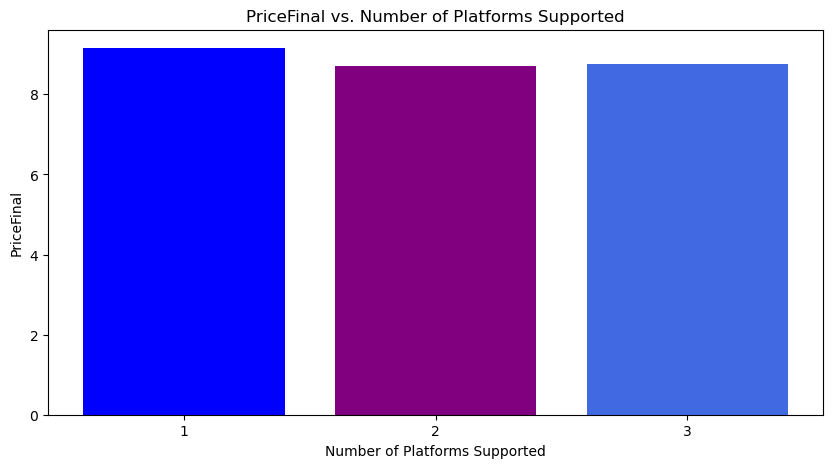

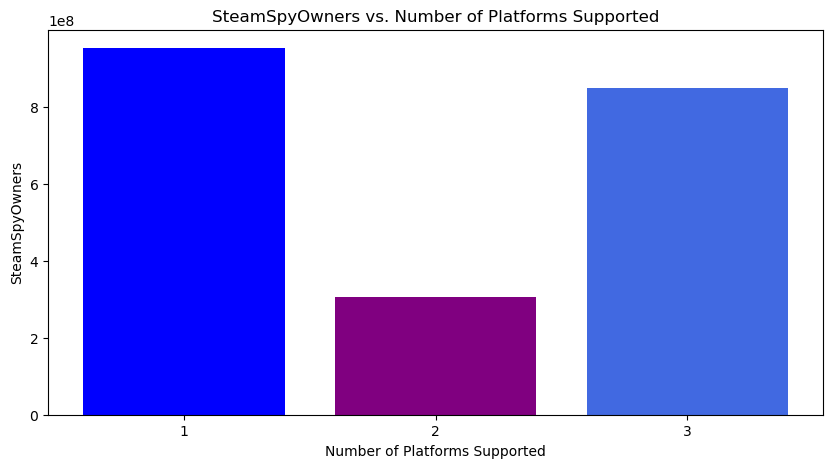

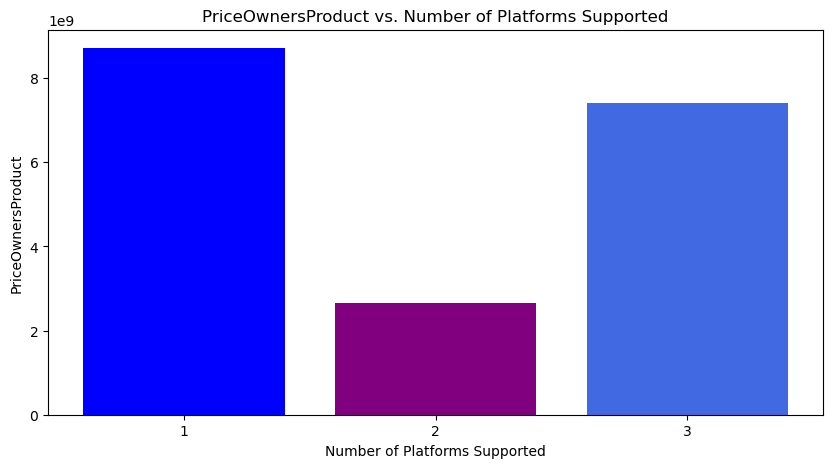

In [12]:
# Set custom colors for the bars
colors = ['blue', 'purple', 'royalblue']

# Loop through the metrics and create bar charts
metrics = ['MetacriticRating', 'RecommendationCount', 'PriceFinal', 'SteamSpyOwners', 'PriceOwnersProduct']

for metric in metrics:
    plt.figure(figsize=(10, 5))
    plt.bar(platform_groups['PlatformCount'], platform_groups[metric], color=colors)
    plt.xlabel('Number of Platforms Supported')
    plt.ylabel(metric)
    plt.title(f'{metric} vs. Number of Platforms Supported')
    plt.xticks(range(1, 4))
    plt.show()

## Analysis

- Games supporting multiple platforms tend to have higher Metacritic ratings and higher popularity (RecommendationCount), suggesting that they may attract more players and receive better reviews.
- The price of games does not show a significant difference based on the number of supported platforms, indicating that pricing may not be a strong factor influencing player counts.
- The total revenue generated (PriceOwnersProduct) increases as the number of supported platforms increases, indicating that games available on more platforms have the potential to generate more revenue.

In summary, games with broader platform support tend to attract more players and receive better reviews, which aligns with the idea that a wider availability of games can lead to increased player engagement and revenue.

### (3) Is there a relationship between Screenshots, Early Access Status and Demos and the number of players?
Create scatterplots to visualize the relationships between the number of screenshots or demos and the mean number of owners.

# 3.1 Screenshots

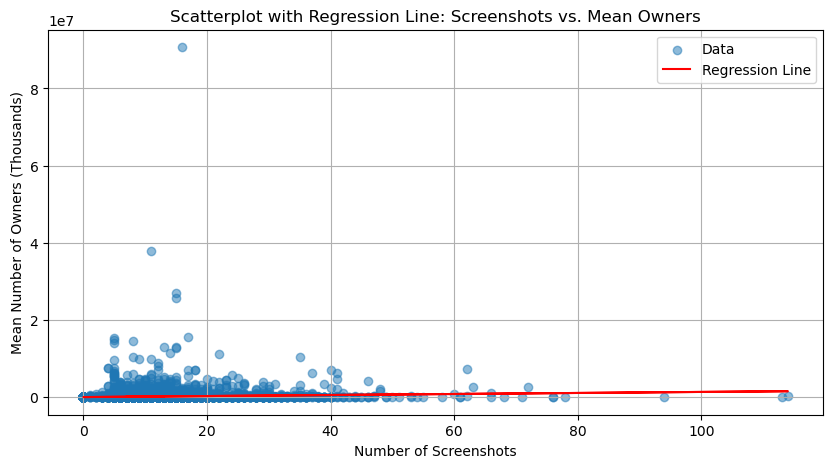

Regression Line Equation: y = 13323.46x + 38163.84
R-squared Value: 0.01


In [26]:
# Define the columns for the scatterplot
x = cleaned_data_df['ScreenshotCount']
y = cleaned_data_df['SteamSpyOwners']

# Calculate the regression line
slope, intercept, r_value, p_value, std_err = linregress(x, y)
regression_line = slope * x + intercept

# Create the scatterplot with regression line
plt.figure(figsize=(10, 5))
plt.scatter(x, y, alpha=0.5, label='Data')
plt.plot(x, regression_line, color='red', label='Regression Line')
plt.xlabel('Number of Screenshots')
plt.ylabel('Mean Number of Owners (Thousands)')
plt.title('Scatterplot with Regression Line: Screenshots vs. Mean Owners')
plt.grid(True)
plt.legend()
plt.show()

# Display regression statistics
print(f'Regression Line Equation: y = {slope:.2f}x + {intercept:.2f}')
print(f'R-squared Value: {r_value**2:.2f}')

## Analysis 
While there might be a slight positive correlation between the number of screenshots and the mean number of owners, it's very weak and not a reliable predictor of the number of owners. Other factors or variables likely play a more significant role in determining the number of owners for games.

# 3.2 Early Access Status

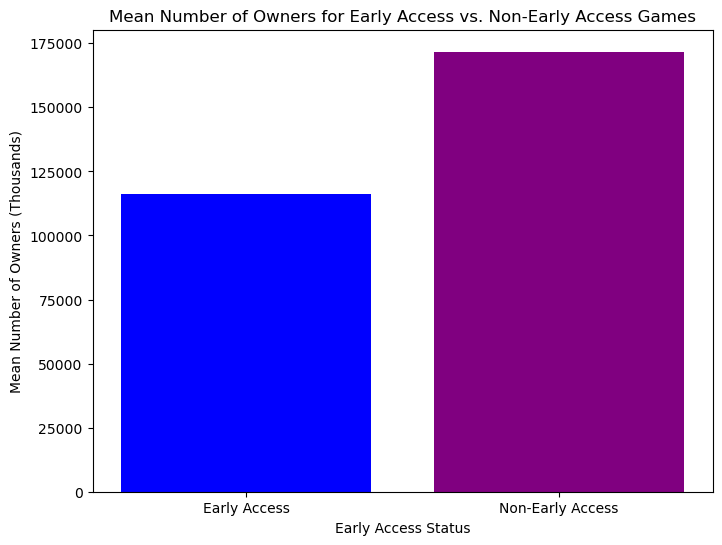

Summary Statistics for Early Access Games:
count    1.387000e+03
mean     1.163283e+05
std      9.545188e+05
min      0.000000e+00
25%      0.000000e+00
50%      2.511000e+03
75%      1.398900e+04
max      2.702529e+07
Name: SteamSpyOwners, dtype: float64

Summary Statistics for Non-Early Access Games:
count    1.132700e+04
mean     1.717112e+05
std      1.159538e+06
min      0.000000e+00
25%      1.347000e+03
50%      1.201600e+04
75%      7.138100e+04
max      9.068758e+07
Name: SteamSpyOwners, dtype: float64

T-Test Results:
T-statistic: -1.7092874677264362
P-value: 0.08742212086015821


In [27]:
from scipy.stats import ttest_ind

# Create a bar chart to compare mean owners for early access vs. non-early access games
early_access_mean = cleaned_data_df[cleaned_data_df['GenreIsEarlyAccess'] == True]['SteamSpyOwners'].mean()
non_early_access_mean = cleaned_data_df[cleaned_data_df['GenreIsEarlyAccess'] == False]['SteamSpyOwners'].mean()

plt.figure(figsize=(8, 6))
plt.bar(['Early Access', 'Non-Early Access'], [early_access_mean, non_early_access_mean], color=['blue', 'purple'])
plt.xlabel('Early Access Status')
plt.ylabel('Mean Number of Owners (Thousands)')
plt.title('Mean Number of Owners for Early Access vs. Non-Early Access Games')
plt.show()

# Calculate summary statistics and perform a t-test
early_access_owners = cleaned_data_df[cleaned_data_df['GenreIsEarlyAccess'] == True]['SteamSpyOwners']
non_early_access_owners = cleaned_data_df[cleaned_data_df['GenreIsEarlyAccess'] == False]['SteamSpyOwners']

early_access_summary = early_access_owners.describe()
non_early_access_summary = non_early_access_owners.describe()

t_stat, p_value = ttest_ind(early_access_owners, non_early_access_owners)

print("Summary Statistics for Early Access Games:")
print(early_access_summary)
print("\nSummary Statistics for Non-Early Access Games:")
print(non_early_access_summary)
print("\nT-Test Results:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

## Analysis 
Based on the data and analysis performed, there is some evidence that non-early access games have a slightly higher mean number of owners compared to early access games. However, this difference is not strong enough to be considered statistically significant at the typical significance level of 0.05. In other words, while there may be a small tendency for non-early access games to attract more players on average, the difference is not substantial enough to draw definitive conclusions. Other factors not considered in this analysis may also influence player counts. 

# 3.3 Demos

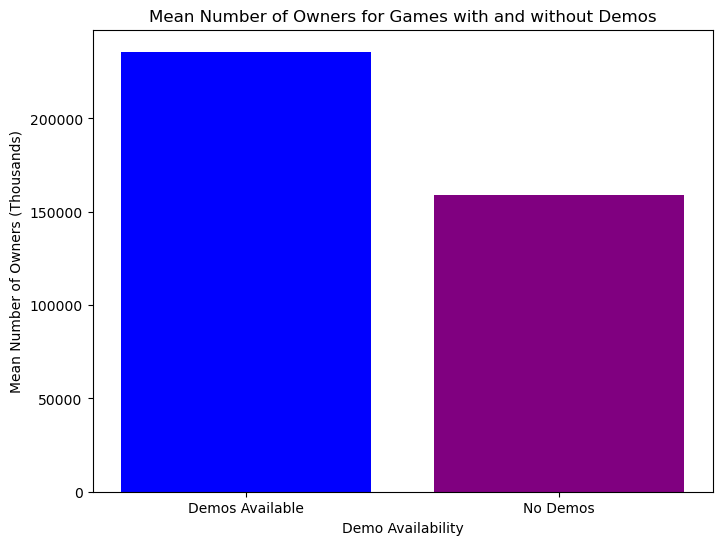

235782.95470692718
158877.59692732609


In [28]:
# Calculate the mean number of owners for games with and without demos
demo_mean = cleaned_data_df[cleaned_data_df['DemoCount'] == 1]['SteamSpyOwners'].mean()
no_demo_mean = cleaned_data_df[cleaned_data_df['DemoCount'] == 0]['SteamSpyOwners'].mean()

# Bar chart for Demos vs. Mean Owners
plt.figure(figsize=(8, 6))
plt.bar(['Demos Available', 'No Demos'], [demo_mean, no_demo_mean], color=['blue', 'purple'])
plt.xlabel('Demo Availability')
plt.ylabel('Mean Number of Owners (Thousands)')
plt.title('Mean Number of Owners for Games with and without Demos')
plt.show()

print(demo_mean)
print(no_demo_mean)

## Analysis

Comparing these two groups, it appears that games with demos available tend to have a higher mean number of owners compared to games without demos. This suggests that there may be a positive relationship between the availability of demos and the number of players.
However, it's important to note that this analysis does not establish causation. While there is a correlation between demos and higher player counts, other factors may also contribute to a game's popularity and player base. Further analysis and research would be needed to explore the causal factors behind this relationship.
In summary, games with demos available tend to attract a larger number of players on average compared to games without demos, indicating a potential positive relationship between demo availability and player counts.